# With metric provided, get the cartesian permittivity tensor

In [1]:
import sympy as sp
from IPython.display import Math

In [2]:
r, theta = sp.symbols('r theta')
M = sp.symbols('M')

In [3]:
g_ij_sph = sp.Matrix([[1/(1-(M/r)), 0, 0],
                       [0, r**2, 0],
                       [0, 0, r**2 * sp.sin(theta)]])

gij_sph = g_ij_sph.inv()


display(Math(r'[g_{ij}] = '+ sp.latex(g_ij_sph)))
display(Math(r'[g^{ij}] = '+ sp.latex(gij_sph)))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

# Have metric in sphericals, need to convert to cartesian

$\delta^{ij} = \frac{\partial x^{i'}}{\partial x^{i}} \frac{\partial x^{j'}}{\partial x^{j}} g_{i'j'}$

In matrix representation, $\frac{\partial x^{i'}}{\partial x^{i}}$ is the jacobian matrix, wher derivatives of the spherical metric components are taken w.r.t $\{x, y, z\}$

$g^{ij} = \Lambda^{i}_{i'} \Lambda^{j}_{j'} g^{i'j'}$ 

Sub in $r = \sqrt{x^2 + y^2 + z^2}$ and $\theta = \arccos{\left( \frac{z}{\sqrt{x^2+y^2=z^2}} \right)}$

In [4]:
x, y, z = sp.symbols('x y z')

r_cart = sp.sqrt(sp.Pow(x,2)+sp.Pow(y,2))
theta_cart = sp.acos(z/r_cart)
phi_cart = sp.atan2(y,x)

display(Math(r'r = '+ sp.latex(r_cart)))
display(Math(r'\theta = '+ sp.latex(theta_cart)))
display(Math(r'\phi = '+ sp.latex(phi_cart)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [5]:
g_ij_sph_cart = g_ij_sph.subs(r, r_cart)
g_ij_sph_cart = g_ij_sph_cart.subs(theta, theta_cart)
g_ij_sph_cart = sp.simplify(g_ij_sph_cart)

gij_sph_cart = gij_sph.subs(r, r_cart)
gij_sph_cart = gij_sph_cart.subs(theta, theta_cart)
gij_sph_cart = sp.simplify(gij_sph_cart)

display(Math(r'[g_{i\prime j\prime}] = '+ sp.latex(g_ij_sph_cart)))
display(Math(r'[g^{i\prime j\prime}] = '+ sp.latex(gij_sph_cart)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [6]:
g_ij_sph_cart_diag_elements = sp.Matrix([[sp.sqrt(g_ij_sph_cart[0,0])],[sp.sqrt(g_ij_sph_cart[1,1])],[sp.sqrt(g_ij_sph_cart[2,2])]])

J = sp.simplify(g_ij_sph_cart_diag_elements.jacobian(sp.Matrix([[x, y, z]])))
J

Matrix([
[                                                 M*x*sqrt(-sqrt(x**2 + y**2)/(M - sqrt(x**2 + y**2)))/(2*(M - sqrt(x**2 + y**2))*(x**2 + y**2)),                                                  M*y*sqrt(-sqrt(x**2 + y**2)/(M - sqrt(x**2 + y**2)))/(2*(M - sqrt(x**2 + y**2))*(x**2 + y**2)),                                                                                          0],
[                                                                                                                            x/sqrt(x**2 + y**2),                                                                                                                             y/sqrt(x**2 + y**2),                                                                                          0],
[x*sqrt(sqrt((x**2 + y**2 - z**2)/(x**2 + y**2))*(x**2 + y**2))*(2*x**2 + 2*y**2 - z**2)/(2*(x**4 + 2*x**2*y**2 - x**2*z**2 + y**4 - y**2*z**2)), y*sqrt(sqrt((x**2 + y**2 - z**2)/(x**2 + y**2))*(x**2 + y**2))*(2*x**2 + 2*y*

In [7]:
g_ij_cart = sp.simplify(sp.Transpose(J)*g_ij_sph_cart*J)
g_ij_cart



Matrix([
[x**2*(M**2*(x**4 + 2*x**2*y**2 - x**2*z**2 + y**4 - y**2*z**2)**2 + (M - sqrt(x**2 + y**2))**4*(x**2 + y**2)**2*(x**2 + y**2 - z**2)*(2*x**2 + 2*y**2 - z**2)**2 + 4*(M - sqrt(x**2 + y**2))**4*(x**2 + y**2)*(x**4 + 2*x**2*y**2 - x**2*z**2 + y**4 - y**2*z**2)**2)/(4*(M - sqrt(x**2 + y**2))**4*(x**2 + y**2)*(x**4 + 2*x**2*y**2 - x**2*z**2 + y**4 - y**2*z**2)**2),  x*y*(M**2*(x**4 + 2*x**2*y**2 - x**2*z**2 + y**4 - y**2*z**2)**2 + (M - sqrt(x**2 + y**2))**4*(x**2 + y**2)**2*(x**2 + y**2 - z**2)*(2*x**2 + 2*y**2 - z**2)**2 + 4*(M - sqrt(x**2 + y**2))**4*(x**2 + y**2)*(x**4 + 2*x**2*y**2 - x**2*z**2 + y**4 - y**2*z**2)**2)/(4*(M - sqrt(x**2 + y**2))**4*(x**2 + y**2)*(x**4 + 2*x**2*y**2 - x**2*z**2 + y**4 - y**2*z**2)**2), x*z*(-2*x**2 - 2*y**2 + z**2)/(4*(x**2 + y**2 - z**2))],
[ x*y*(M**2*(x**4 + 2*x**2*y**2 - x**2*z**2 + y**4 - y**2*z**2)**2 + (M - sqrt(x**2 + y**2))**4*(x**2 + y**2)**2*(x**2 + y**2 - z**2)*(2*x**2 + 2*y**2 - z**2)**2 + 4*(M - sqrt(x**2 + y**2))**4*(x**2 + y**2)*

In [8]:
gij_cart = sp.simplify(sp.Pow(g_ij_cart,-1))
gij_cart

Matrix([
[x**2*(M**2*(x**4 + 2*x**2*y**2 - x**2*z**2 + y**4 - y**2*z**2)**2 + (M - sqrt(x**2 + y**2))**4*(x**2 + y**2)**2*(x**2 + y**2 - z**2)*(2*x**2 + 2*y**2 - z**2)**2 + 4*(M - sqrt(x**2 + y**2))**4*(x**2 + y**2)*(x**4 + 2*x**2*y**2 - x**2*z**2 + y**4 - y**2*z**2)**2)/(4*(M - sqrt(x**2 + y**2))**4*(x**2 + y**2)*(x**4 + 2*x**2*y**2 - x**2*z**2 + y**4 - y**2*z**2)**2),  x*y*(M**2*(x**4 + 2*x**2*y**2 - x**2*z**2 + y**4 - y**2*z**2)**2 + (M - sqrt(x**2 + y**2))**4*(x**2 + y**2)**2*(x**2 + y**2 - z**2)*(2*x**2 + 2*y**2 - z**2)**2 + 4*(M - sqrt(x**2 + y**2))**4*(x**2 + y**2)*(x**4 + 2*x**2*y**2 - x**2*z**2 + y**4 - y**2*z**2)**2)/(4*(M - sqrt(x**2 + y**2))**4*(x**2 + y**2)*(x**4 + 2*x**2*y**2 - x**2*z**2 + y**4 - y**2*z**2)**2), x*z*(-2*x**2 - 2*y**2 + z**2)/(4*(x**2 + y**2 - z**2))],
[ x*y*(M**2*(x**4 + 2*x**2*y**2 - x**2*z**2 + y**4 - y**2*z**2)**2 + (M - sqrt(x**2 + y**2))**4*(x**2 + y**2)**2*(x**2 + y**2 - z**2)*(2*x**2 + 2*y**2 - z**2)**2 + 4*(M - sqrt(x**2 + y**2))**4*(x**2 + y**2)*

In [9]:
gamma = r_cart**2 * sp.sin(theta_cart)

det_gij_cart = sp.det(gij_sph)/gamma

In [10]:
#E00_asd = (det_gij_cart)**0.5 * gij_cart[0,0]
det_gij_cart = det_gij_cart.subs(r, r_cart)
det_gij_cart = sp.simplify(det_gij_cart.subs(theta, theta_cart))


In [11]:
gij_cart[0,0]

KeyboardInterrupt: 

In [ ]:
Eij_to_eval = Eij.subs(r, r_cart)
Eij_to_eval = Eij_to_eval.subs(theta, theta_cart)
Eij_to_eval = Eij_to_eval.subs(x, sp.symbols('(xg)'))
Eij_to_eval = Eij_to_eval.subs(y, sp.symbols('(yg)'))
Eij_to_eval = Eij_to_eval.subs(z, sp.symbols('(0)'))
Eij_to_eval = Eij_to_eval.subs(M, sp.symbols('(1)'))

In [ ]:
import numpy as np
from numpy import sqrt, sin, pi, exp
from numpy import arctan as atan

pts=1000
grid = np.linspace(-1,1,pts)

xg, yg = np.meshgrid(grid, grid)
zg = 0

In [ ]:
E_comps = []

for i in range(3):
    for j in range(3):
        E_comps.append(Eij_to_eval[i,j])



In [ ]:
E_comps_num = []

E_comps_num[:] = eval(str(E_comps[:]))

for i in range(9):

        if type(E_comps_num[i])==int:
                E_comps_num[i] = np.zeros((pts,pts))
        print(np.shape(E_comps_num[i]))



<string>:1: RuntimeWarning: invalid value encountered in sqrt


(1000, 1000)
(1000, 1000)
(1000, 1000)
(1000, 1000)
(1000, 1000)
(1000, 1000)
(1000, 1000)
(1000, 1000)
(1000, 1000)


In [ ]:
import matplotlib.pyplot as plt

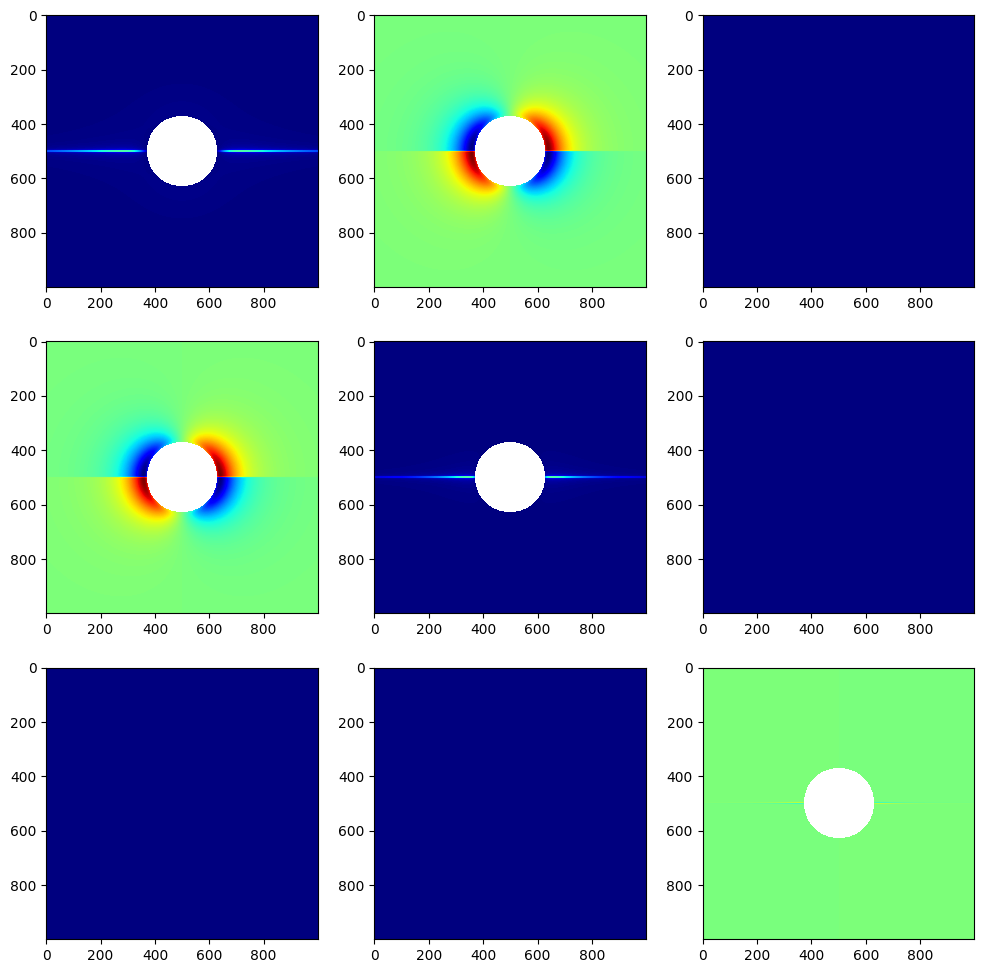

In [ ]:
fig = plt.figure(figsize=(12,12))

for i in range(9):
    ax = fig.add_subplot(3,3,i+1)
    ax.set_aspect('equal')
    ax.imshow(E_comps_num[i], cmap='jet')